# Generación de un modelo a partir de uno modelo pre-entrenado
---
**Configuración General del Entorno de Trabajo**

Esta sección detecta si el notebook está corriendo en un entorno COLAB o en uno LOCAL . Monta la carpeta de Google Drive si corresponde y define constantes para trabajar de forma general con cualquir script. Modificar las definiciones de las carpetas según el entorno y configuración del mismo.

In [39]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:     
    # configuración para notebook en COLAB
    DRIVE_DIR = '/content/drive/MyDrive/' # carpeta G-Drive
    MNT_DRIVE_DIR = '/content/drive/'     # carpeta donde montar G-Drive
    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Fuentes' 
    DATOS_DIR = DRIVE_DIR + 'Datos/'      # carpeta donde se encuentran los datasets

    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount(MNT_DRIVE_DIR)
else:
    # configuración para notebook con instalación LOCAL
    
    
    FUENTES_DIR = './RN2022/Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = 'D:/Internet/G-Drive/Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

---
**Preparación de Dataset**

Para poder trabajar con el dataset se debe:
1. Copiar los archivos FlowersX16.7z.001 y FlowersX16.7z.002 en la carpeta drive de los datos (establecida para este script en DATOS_DIR).
2. Ubicar el directorio actual en la misma carpeta
3. Descomprimir con 7zip los archivos

In [40]:
# Los archivos FlowersX16.7z.001 y FlowersX16.7z.002 deben estar en la carpeta
# para descomprimir las imagenes con el compresor 7zip
# !7z x "/content/drive/MyDrive/Datos/FlowersX16.7z.001" -o"/content/drive/MyDrive/Datos/"


**Construcción del Modelo**

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.
Epoch 1/1000
197/197 [==============================] - 35s 128ms/step - loss: 2.7262 - accuracy: 0.1242 - val_loss: 2.7410 - val_accuracy: 0.2334
Epoch 2/1000
197/197 [==============================] - 22s 111ms/step - loss: 2.4552 - accuracy: 0.2434 - val_loss: 2.6260 - val_accuracy: 0.3232
Epoch 3/1000
197/197 [==============================] - 21s 107ms/step - loss: 2.2937 - accuracy: 0.3042 - val_loss: 2.3521 - val_accuracy: 0.3818
Epoch 4/1000
197/197 [==============================] - 22s 111ms/step - loss: 2.1826 - accuracy: 0.3479 - val_loss: 2.1422 - val_accuracy: 0.3818
Epoch 5/1000
197/197 [==============================] - 20s 101ms/step - loss: 2.0823 - accuracy: 0.3713 - val_loss: 2.0186 - val_accuracy: 0.4102
Epoch 6/1000
197/197 [==============================] - 22s 108ms/step - loss: 2.0021 - accuracy: 0.3961 - val_loss: 1.9140 - val_accuracy: 0.4600
Epoch 7/1000
197/197 [=========

Epoch 55/1000
197/197 [==============================] - 21s 107ms/step - loss: 1.2135 - accuracy: 0.6165 - val_loss: 1.3049 - val_accuracy: 0.6221
Epoch 56/1000
197/197 [==============================] - 21s 106ms/step - loss: 1.2034 - accuracy: 0.6208 - val_loss: 1.3459 - val_accuracy: 0.6074
Epoch 57/1000
197/197 [==============================] - 23s 116ms/step - loss: 1.2042 - accuracy: 0.6217 - val_loss: 1.3003 - val_accuracy: 0.6201
Epoch 58/1000
197/197 [==============================] - 21s 108ms/step - loss: 1.1945 - accuracy: 0.6197 - val_loss: 1.2898 - val_accuracy: 0.6250
Epoch 59/1000
197/197 [==============================] - 21s 106ms/step - loss: 1.1968 - accuracy: 0.6174 - val_loss: 1.2862 - val_accuracy: 0.6387
Epoch 60/1000
197/197 [==============================] - 22s 110ms/step - loss: 1.1883 - accuracy: 0.6231 - val_loss: 1.3557 - val_accuracy: 0.6064
Epoch 61/1000
197/197 [==============================] - 21s 109ms/step - loss: 1.1875 - accuracy: 0.6244 - val_

197/197 [==============================] - 21s 107ms/step - loss: 0.9165 - accuracy: 0.7020 - val_loss: 1.1280 - val_accuracy: 0.6602
Epoch 166/1000
197/197 [==============================] - 21s 108ms/step - loss: 0.9207 - accuracy: 0.6973 - val_loss: 1.2434 - val_accuracy: 0.6602
Epoch 167/1000
197/197 [==============================] - 21s 107ms/step - loss: 0.9008 - accuracy: 0.7019 - val_loss: 1.2908 - val_accuracy: 0.6592
Epoch 168/1000
197/197 [==============================] - 21s 106ms/step - loss: 0.9069 - accuracy: 0.7065 - val_loss: 1.2357 - val_accuracy: 0.6582
Epoch 169/1000
197/197 [==============================] - 19s 97ms/step - loss: 0.9006 - accuracy: 0.7055 - val_loss: 1.2047 - val_accuracy: 0.6748
Epoch 170/1000
197/197 [==============================] - 22s 110ms/step - loss: 0.8949 - accuracy: 0.7059 - val_loss: 1.1655 - val_accuracy: 0.6689
Epoch 171/1000
197/197 [==============================] - 21s 108ms/step - loss: 0.9049 - accuracy: 0.7017 - val_loss: 1.2

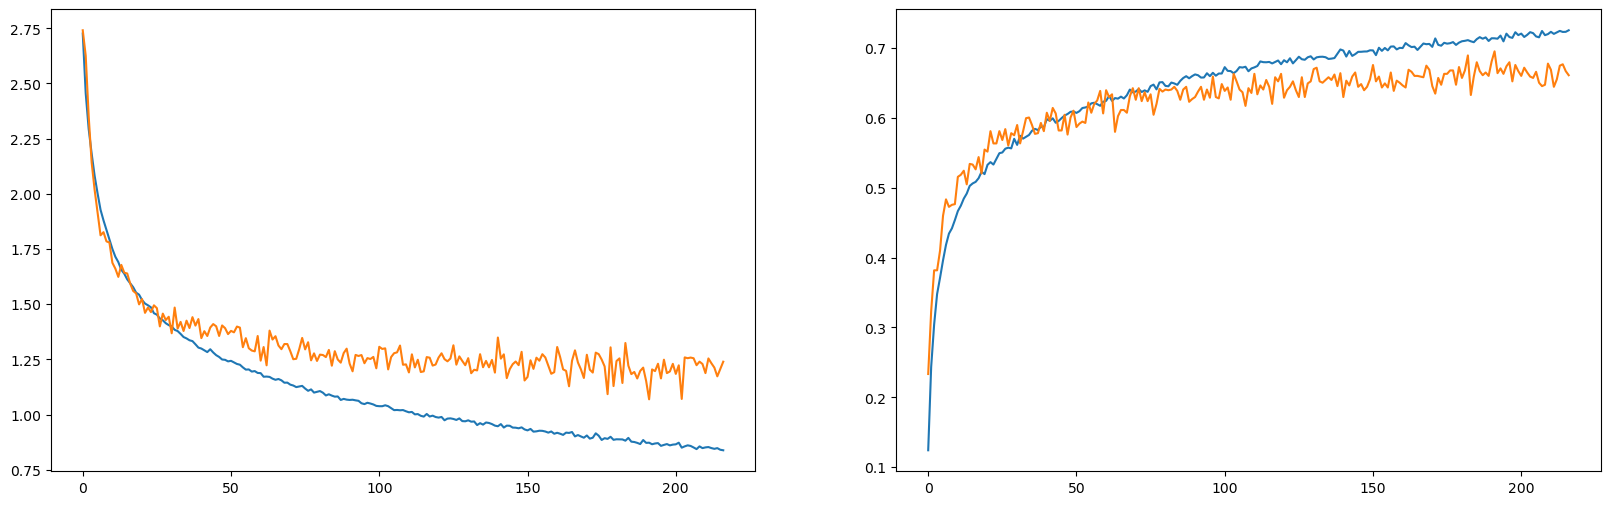

<Figure size 640x480 with 0 Axes>

In [48]:
from tensorflow.keras.applications import MobileNetV3Small
#from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten  , Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt



# constantes para arquitectura, generación datos y entrenamiento/validacion
IMG_SIZE = (96, 96, 3)  # tamaño de la imagen de entrada
N_CLASSES = 16          # cantidad de clases a identificar
LOTES = 64             # tamaño de lotes para entrenamiento y testeo 
ALFA = 0.00005           # tasa de entrenamiento
EPOCAS = 1000           # cantidad de epocas a entrenar como máximo
PACIENCIA = 25          # parámetro para parada temprana
SEP_TRAIN_TEST = 0.2    # división en entrenamiento y validación 

# %% construye le modelo
# obtiene la arquitectura para el modelo pre-entrenado
feature_model = MobileNetV3Small(
    #input_shape=IMG_SIZE,
    minimalistic=False,
    #include_top=False,
    weights="imagenet",
    include_preprocessing=True,
)

# construye el modelo de manera funcional
layers = Flatten() (feature_model.output)
layers = Dense(256, activation="LeakyReLU")(layers)
layers = BatchNormalization()(layers)
layers = Dropout(0.2)(layers)
output = Dense(N_CLASSES, activation='softmax')(layers)

model = Model(inputs=feature_model.input, outputs=output)

# The newly added layers are initialized with random values.
# Make sure based model remain unchanged until newly added layers weights get reasonable values.
for layer in feature_model.layers:
    layer.trainable = False

#Optimizer
opt = Adam(learning_rate=ALFA)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# %% Entrenamiento del modelo 

IMAGES_DIR = DATOS_DIR + 'FlowersX16'

# construye un generador de imagenes para dividir en entrenamiento y validación
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST
)

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )

# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=PACIENCIA,  
                           restore_best_weights=True)

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 16,
    epochs=EPOCAS,
    callbacks=[early_stop])

# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

In [ ]:
model.evaluate(train_iter)
model.evaluate(valid_iter)